# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team-14**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


## Introduction

### Climate Change Belief Analysis 2022


A warming planet creates many risks not only for the humans and animals on the plant but also for  businesses.Companies need to participate in globl warming conversations and actions because they are directly affected by it. Climate change is expensive for compnies, poses a risk to the supply and causes increases in both insurance and labour costs. As such many companies are built around lessening one’s environmental impact or carbon footprint. These companies offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. 



#### Problem statement

We have been tasked with determining how people perceive climate change and whether or not they believe it is a real threat.Providing an accurate and robust model will give companies access to a broad base of consumer sentiment on global warming. This will enable companies to increase their insights and can inform future marketing strategies.

#### Data

The collection of the data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change


<a id="cont"></a>

## Table of Contents
<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

- <a href=#two>3.1 Numerical and categorical features</a>

- <a href=#four>3.2 Null Values </a>

- <a href=#four>3.3 Descriptive analysis </a>

- <a href=#four>3.4 The target variable </a>

- <a href=#four>3.5 Feature variables </a>


<a href=#four>4. Data Engineering</a>

- <a href=#four>4.1 removing the web-urls</a>

- <a href=#four>4.2 Lowercase conversion </a>

- <a href=#four>4.3 Removing punctuation and special characters </a>

- <a href=#four>4.4 Lemmatization </a>

- <a href=#four>4.5 Removing Stop words </a>

- <a href=#four>4.6 Feature Extraction using CountVectorizer </a>

- <a href=#four>4.7 Preparing the test dataset </a>


<a href=#five>5. Modeling</a>


- <a href=#four>5.1 Logistic regression classification </a>

- <a href=#four>5.2 Decision Tree </a>

- <a href=#four>5.3 Random Forests</a>

- <a href=#four>5.4 Naive Bayes</a>

- <a href=#four>5.5 k nearest neighbuors </a>

- <a href=#four> </a>

- <a href=#four> </a>


<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In this section the necessary libraries that will be used throughout the anaylisis are imported.

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import neattext.functions as nt
import neattext.functions as nt

import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer


# set plot style
sns.set()


#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section the data is loaded from the `df_train` file.



In [2]:
#show all columns
pd.set_option('display.max_colwidth', None)

 # load the data
df_train = pd.read_csv('train.csv')

In [3]:
# View dataset
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section,  an in-depth analysis of all the variables in the DataFrame is perfomed.

-  Numerical and categorical features
-  Null values
-  Descriptive analysis 
-  The target variable 'sentiment'
-  Feature variables 'message'

###  3.1 Numerical and categorical features

Looking  at the method df.info(). This will provide the information about the data types of the variables, the number of variables and the non-null count for each variable.

In [4]:
#train information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Sentiment and tweetid columns contains numerical data, while clean_message contain Categorical data

###  3.2 Null Values

 Looking at the function df.isnull().sum(). This will give us information about which variables have null values.

In [5]:
#checking for nulls
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are no null values present in all columns.

###  3.3 Descriptive analysis

To run summary statistics on columns containing `Numerical data`, we use `.describe()` function

In [6]:
#descriptive analysis
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


Summary statistics on `Categorical` column

In [7]:
#descriptive analysis for categorical information
df_train.describe(include='object')

,message
count,15819
unique,14229
top,RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
freq,307


We notice that there are duplicates in message column, as shown by the unique row. These could be messages retweeted by different people.   

Possible solution would be to drop the duplicate columns. 

###  3.4 The target variable 'sentiment'

##### Class Description (Sentiments)

- 2 : News: the tweet links to factual news about climate change
- 1 : Pro: the tweet supports the belief of man-made climate change
- 0 : Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1: Anti: the tweet does not believe in man-made climate change

In [8]:
# list of unique types of Sentiments
type_sentis = list(sorted(df_train.sentiment.unique()))
print(type_sentis)

[-1, 0, 1, 2]


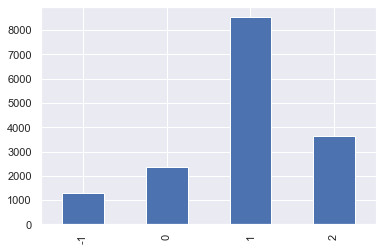

In [9]:
# bar graph of Sentiments
df_train['sentiment'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

It can be observed that the classes are not balanced. Majority of the tweets belong to classe 1(Pro: the tweet supports the belief of man-made climate change) and class -1(Anti: the tweet does not believe in man-made climate change) has the least amount of tweets.  The data shows that there are a lot more people who believe climate change is man mode then those who don't.

###  3.5 Feature variables 'message'

#### Words cloud of frequently twitted words

We will create a word could image of the frequently twitted word in each of the different classes which are as follows:

* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

In [10]:
#Copy of dataframe
df_gm = df_train.copy()

In [11]:
#create different dataframes for each of the classes
df_news= df_gm.drop(df_gm[df_gm.sentiment <= 1].index)

df_pro= df_gm.drop(df_gm[df_gm.sentiment<=0].index)
df_pro= df_gm.drop(df_gm[df_gm.sentiment>=2].index)

df_neutral= df_gm.drop(df_gm[df_gm.sentiment<=(-1)].index)
df_neutral= df_gm.drop(df_gm[df_gm.sentiment>=1].index)

df_anti= df_gm.drop(df_gm[df_gm.sentiment>=0].index)

Text(0.5, 1.0, 'Anti Tweets')

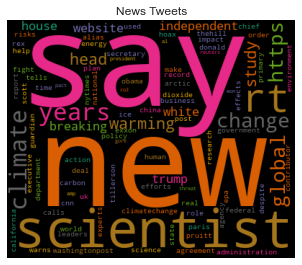

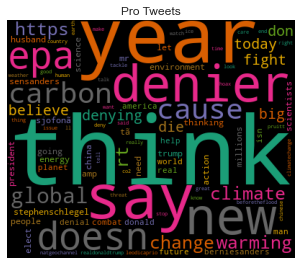

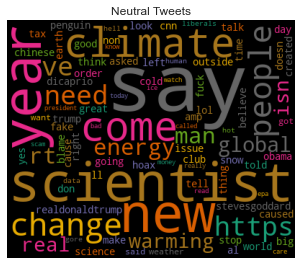

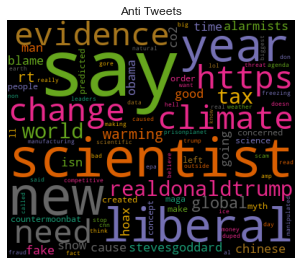

In [12]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_news['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2
#createWordCloud
a=wc.generate(string)

plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(a)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("News Tweets")
##########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_pro['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
b=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(b)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.title("Pro Tweets")
##################################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_neutral['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
c=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(c)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Neutral Tweets")

#########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_anti['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
d=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(d)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Anti Tweets")


These are some of the most frequently twitted words for each of the classes

- 1) 2 News: say, new, scientists, climate, change, years, warming, study, government
- 2) 1 Pro: think, year, epa, doesn't, denier, cause, warming, carbon, climate
- 3) 0 Neutral: scientist, climate, change, global, warming, realdonaldtrump, energy, worl
- 4) -1 Anti: scientist, liberal, climate, change, evidence, need, blame, tax, stevesgoddard



## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Data engineering is the complex task of making raw data usable for the modeling phase. In this section we engineer the features such that they are ready for modelling


For our dataset, we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation and special characters
* removing mentions and retweets(`rt`)

### 4.1 removing the web-urls

In [13]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

### 4.2 Lowercase conversion

In [14]:
#loewer case conversion
df_train['message'] = df_train['message'].str.lower()

### 4.3 Removing punctuation and special characters

We create a funcion that will remove the web-urls, punctuation, and mentions along with retweets(`rt`)

In [15]:
def data_cleaning(tweet):
    tweet = re.sub(r'@[a-z0-9]+', '', tweet) # removing mentions
    tweet = re.sub(r'#', '', tweet) # remove #
    tweet = re.sub(r'rt[\s]+', '', tweet) # remove retweets(`rt`)
    #tweet = re.sub(r'url-web', '', tweet) # remove web-urls
    
    return tweet

df_train['clean_message'] = df_train['message'].apply(data_cleaning)

df_train.head(2)

,sentiment,message,tweetid,clean_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via"
1,1,it's not like we lack evidence of anthropogenic global warming,126103,it's not like we lack evidence of anthropogenic global warming


#### In case of special characters and extra whitespace, we employed NeatText 

In [16]:
# Remove special characters using NeatText
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_special_characters)

# Remove multiple whitespace between words
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_multiple_spaces)

df_train.head(2)

,sentiment,message,tweetid,clean_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,it's not like we lack evidence of anthropogenic global warming,126103,its not like we lack evidence of anthropogenic global warming


In [17]:
#view clean and processed "message" with the unclean and unprocessed
df_train[['message','clean_message']].head()

,message,clean_message
0,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,it's not like we lack evidence of anthropogenic global warming,its not like we lack evidence of anthropogenic global warming
2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…,researchers say we have three years to act on climate change before its too late urlweb urlweb
3,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb
4,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight


In [18]:
#drop unclean and unprocessed message
df_train = df_train.drop('message', axis=1)

df_train.head(2)

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,126103,its not like we lack evidence of anthropogenic global warming


 ### 4.4 Lemmatization

Lemmatization will help in getting the root forms (synonyms) of the words.

In [19]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemma(words, lemmatizer):
    return ' '.join(([lemmatizer.lemmatize(word) for word in words.split()]))

df_train['clean_message'] = df_train['clean_message'].apply(lemma, args=(lemmatizer, ))

df_train.head(2)


,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,126103,it not like we lack evidence of anthropogenic global warming


### 4.5 Removing Stop words

In [20]:
#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_train['clean_message']= df_train['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_train.head()

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait urlweb via
1,1,126103,like lack evidence anthropogenic global warming
2,2,698562,researcher say three year act climate change late urlweb urlweb
3,1,573736,todayinmaker wired 2016 wa pivotal year war climate change urlweb
4,1,466954,2016 racist sexist climate change denying bigot leading poll electionnight


### 4.6 Spelling

In [21]:
#from textblob import TextBlob 

#def spelling(words):
 #   return ' '.join(([str(TextBlob(word).correct()) for word in words.split()]))

#df_train['clean_message'] = df_train['clean_message'].apply(spelling)

#df.head()

### 4.7 Process and clean unseen test data

In [22]:
df_test = pd.read_csv('test_with_no_labels.csv')
#df_test.info()

In [23]:
#removing the web-urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Lowercase conversion
df_test['message'] = df_test['message'].str.lower()

#Removing punctuation and special characters
def data_cleaning(tweet):
    tweet = re.sub(r'@[a-z0-9]+', '', tweet) # removing mentions
    tweet = re.sub(r'#', '', tweet) # remove #
    tweet = re.sub(r'rt[\s]+', '', tweet) # remove retweets(`rt`)
    #tweet = re.sub(r'url-web', '', tweet) # remove web-urls
    
    return tweet

df_test['clean_message'] = df_test['message'].apply(data_cleaning)

# Remove special characters using NeatText
df_test['clean_message'] = df_test['clean_message'].apply(nt.remove_special_characters)


 ### 4.4 Lemmatization
lemmatizer = WordNetLemmatizer()

def lemma(words, lemmatizer):
    return ' '.join(([lemmatizer.lemmatize(word) for word in words.split()]))

df_test['clean_message'] = df_test['clean_message'].apply(lemma, args=(lemmatizer, ))

#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_test['clean_message']= df_test['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#drop unclean and unprocessed message
df_test = df_test.drop('message', axis=1)
df_test.head(2)


,tweetid,clean_message
0,169760,europe looking china make sure alone fighting climate change urlweb
1,35326,combine polling staffer climate change woman right fascist state urlweb


In [24]:
#Count Vectorizer on unseen test dat

vect_test = CountVectorizer(stop_words='english', min_df=2)

vect_fit_test=vect_test.fit(df_test['clean_message'])

vect_transform_test=vect_test.transform(df_test['clean_message'])

feat_test=vect_transform_test.toarray()

#scaling Vect_test
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
feat_test = scaler.fit_transform(feat_test)

x_feat=pd.DataFrame(feat_test, columns = vect_test.get_feature_names())
x_feat.head(2)

C:\Users\u1121\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00018,10,100,1000,100days,100th,101,109c,10th,11,...,youve,yr,yung,zealand,zero,zika,zimbabwe,zimmer,zoe,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#get feature names from vector
x_names=vect_test.get_feature_names()

C:\Users\u1121\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 4.8 Feature Extraction using CountVectorizer

The text feature extraction module called CountVectorizer is used to convert a collection of documents (rows of text) into a matrix of token counts.

In [26]:
# create vectorizer instance
vect = CountVectorizer(stop_words='english', min_df=2)

#fit vectorizer
vect.fit(df_train['clean_message'])

CountVectorizer(min_df=2, stop_words='english')

In [27]:
# NUM of predictors
print(len(vect.vocabulary_))

6959


In [28]:
#transform features to numbers for modelling
vect_transform=vect.transform(df_train['clean_message'])

# Get shape of our predictive variables
vect_transform.shape

(15819, 6959)

In [29]:
#scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_feat = scaler.fit_transform(vect_transform.toarray())

X_feat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
#datafram of X features
X_feat=pd.DataFrame(X_feat, columns = vect.get_feature_names())

X_feat.head()

C:\Users\u1121\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1000,100000,101,105,109c,10yrs,11,110,...,zealot,zealotry,zero,zijn,zika,zimbabwe,zimmer,zinke,zoe,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
##### Match features

#new_X_feat=X_feat[x_names]

#text that is  not common in both text
no_match=['00018', '100days', '100th', '10th', '12tn', '137', '1850', '1900', '193', '1960s', '1977', '1978', '1981', '1982', '1988', '1stglobal', '2020dontbelate', '2025644700', '2080', '2140', '24m', '2a', '30000', '35m', '360video', '375b', '3rdlargest', '4000', '49', '52', '55', '630', '72', '750', '78', '7th', '810', '85', '8th', '93', '99c', 'a1', 'abbottturnbull', 'abo', 'abscbn', 'absorb', 'acceptable', 'accessible', 'accession', 'accountable', 'acidification', 'actionurlweb', 'activi', 'activit', 'adaption', 'adesina', 'admire', 'adopted', 'aerial', 'affirm', 'aga', 'agm', 'agri', 'airpocalypse', 'ak', 'akin', 'alarmed', 'alarmis', 'alex', 'alot', 'alters', 'altgov', 'alumnus', 'amaze', 'amazonians', 'amiright', 'amor', 'analogy', 'analyzes', 'analyzing', 'anatomy', 'ancestor', 'andrea', 'anniversary', 'answered', 'antigay', 'anyways', 'aok', 'appalling', 'application', 'applied', 'approving', 'argentinian', 'arguable', 'argued', 'arizona', 'armed', 'arrest', 'arrival', 'asap', 'ash', 'ashamed', 'asleep', 'assad', 'assist', 'assisted', 'astonishingly', 'astronaut', 'atashesi', 'attending', 'awardwinning', 'awe', 'awkward', 'aww', 'aye', 'backyard', 'balanced', 'banal', 'bangladeshi', 'banker', 'banking', 'bar', 'barrow', 'barry', 'bartley', 'baseless', 'baseline', 'bat', 'beard', 'beauty', 'beefban', 'belong', 'belt', 'bend', 'berg', 'besar', 'bezos', 'binding', 'biomedical', 'bitter', 'blacklistfor', 'blatantly', 'blessed', 'blizzard2017', 'blossom', 'bluehand', 'bn', 'bollock', 'bombshell', 'bothered', 'boulder', 'boutta', 'boyfriend', 'braavarela', 'branch', 'branding', 'bre', 'bread', 'breaker', 'breakneck', 'breakup', 'breathing', 'brett', 'brics', 'briefed', 'btsbbmas', 'burden', 'buries', 'bussin', 'busyme', 'cab', 'cabal', 'californian', 'cambridge', 'canberra', 'cannes', 'capable', 'capacity', 'carbondioxide', 'carbontax', 'cardsmove', 'carson', 'carteret', 'catalyst', 'cau', 'ceiling', 'censored', 'chan', 'chang', 'changealways', 'changebut', 'changeclimate', 'changeclimatechange', 'changefor', 'changeha', 'changehow', 'changehttp', 'changei', 'changeinduced', 'changeso', 'changetrump', 'chapter', 'characterized', 'charged', 'charlie', 'chatted', 'cheaper', 'checkmate', 'chick', 'chosen', 'christopher', 'chromosome', 'chuck', 'chump', 'cicerone', 'cigarette', 'citiesclimate', 'clark', 'classmate', 'classroom', 'cleverest', 'click', 'climatecentral', 'climatechangeshealth', 'climatechangeurlweb', 'climatehour', 'climber', 'clip', 'closest', 'coalmines', 'coexist', 'cognitive', 'collapsing', 'colombia', 'colorful', 'comey', 'comm', 'communication', 'comparable', 'comparing', 'compensation', 'compiling', 'complexity', 'condemned', 'condemns', 'conf', 'congo', 'congratulating', 'conservationist', 'conserving', 'constitutional', 'construct', 'consultation', 'contain', 'controversy', 'convention', 'cookstove', 'coordination', 'cop13', 'copenhagen', 'corrected', 'correctness', 'cotton', 'counting', 'couorders', 'couurlweb', 'cpcldr', 'crab', 'crafting', 'creator', 'cricket', 'criticized', 'cross', 'crude', 'crusade', 'cruzs', 'ctv', 'cutie', 'cycling', 'czar', 'dahil', 'dai', 'dampak', 'dancing', 'dangerousreason', 'darth', 'database', 'dave', 'debated', 'debbie', 'dec', 'deceitful', 'deceiving', 'decimated', 'deck', 'declare', 'decrease', 'decreasing', 'defiant', 'defining', 'definition', 'defra', 'demonic', 'denmark', 'denounced', 'dent', 'dependence', 'depiction', 'deportation', 'deposit', 'descent', 'described', 'dese', 'desecloser', 'devastated', 'device', 'devote', 'dial', 'dialogue', 'dictate', 'differently', 'dimension', 'dimmer', 'diplomatic', 'disavowing', 'disbands', 'disgraced', 'disguised', 'dismantled', 'dismantles', 'dismayed', 'dismissal', 'disorder', 'displacement', 'disputed', 'disrupt', 'dissonance', 'distraction', 'disturbing', 'dive', 'dividing', 'division', 'diy', 'dod', 'dokumenter', 'dominate', 'donating', 'donthecon', 'doomsdayclock', 'doorway', 'dope', 'douglas', 'downplays', 'draining', 'dreamer', 'drier', 'drown', 'drowns', 'drumpf', 'drying', 'dsnscience', 'dumped', 'dyk', 'ea', 'earful', 'earthhour2017', 'earthhours', 'earthsky', 'ec', 'educationa', 'elaborate', 'electoral', 'emailed', 'emitter', 'emphasized', 'enduring', 'energynews', 'enforce', 'enlightened', 'enrich', 'ensuring', 'enter', 'entered', 'entitlement', 'entourage', 'eos', 'epaa', 'erase', 'erasing', 'escalate', 'establishment', 'estimate', 'estimated', 'ethical', 'evaded', 'evolving', 'exaggerated', 'examiner', 'excellence', 'exempt', 'exo', 'expe', 'explainer', 'exploitation', 'exploration', 'exploring', 'exponential', 'express', 'extended', 'extensive', 'eyewitness', 'fabled', 'faculty', 'fairly', 'falseurlweb', 'faltering', 'fascism2', 'faulty', 'fbi', 'feb', 'fee', 'fetus', 'fiddled', 'filth', 'finna', 'finnish', 'fist', 'flatearthers', 'flatout', 'flip', 'flop', 'fm', 'fn', 'formal', 'formed', 'forth', 'fourth', 'foxnews', 'fragility', 'framing', 'frat', 'frightful', 'frio', 'frisk', 'frontrunner', 'frustrating', 'fue', 'fuelled', 'fuelling', 'fulfill', 'fundamentally', 'fundraiser', 'fur', 'furious', 'gaia', 'gained', 'gak', 'gatlinburg', 'gear', 'gee', 'geez', 'genetics', 'gesture', 'getready', 'girlfriend', 'glassyeyed', 'gmos', 'goodnight', 'gorgeous', 'govegan', 'gpusa', 'grandma', 'grandson', 'grasp', 'greatly', 'greenscam', 'grew', 'grid', 'grief', 'grist', 'grizzly', 'gross', 'groundhogday', 'guarantee', 'guessing', 'gunna', 'guru', 'haiku', 'hailstorm', 'hang', 'haphazard', 'happer', 'haram', 'harass', 'harshest', 'hater', 'haunting', 'hawaiian', 'headass', 'headed', 'heal', 'hears', 'heath', 'helpful', 'hemplemanadams', 'hhs', 'highlighting', 'hilary', 'hilton', 'hinder', 'hivaids', 'hmmm', 'hoc', 'hog', 'hometown', 'homo', 'hosted', 'hostility', 'household', 'howard', 'hu', 'hub', 'huffington', 'hugely', 'hunter', 'hunting', 'iam', 'iamaclimatechangedenier', 'ian', 'iceland', 'icing', 'idc', 'identity', 'idiocy', 'illustration', 'immaterial', 'imminent', 'imposed', 'incorrectly', 'ind', 'indepth', 'indisputable', 'indonesia', 'influenced', 'influencing', 'infographic', 'informal', 'informative', 'infrast', 'injecting', 'injury', 'inner', 'inquirer', 'inst', 'instructed', 'instrumental', 'integrate', 'intelligence', 'intend', 'intends', 'intensify', 'interfere', 'intergenerational', 'intl', 'introduced', 'introducing', 'investmenturlweb', 'inviting', 'ipa', 'irrational', 'iwantamerica', 'jack', 'jail', 'jailing', 'jampk', 'japanese', 'jfk', 'joking', 'jon', 'jordan', 'josefina', 'juans', 'kamala', 'kardashian', 'kathy', 'keepitintheground', 'kept', 'keynote', 'kicking', 'kn', 'knife', 'knight', 'knowingly', 'knowledgeable', 'ksa', 'lacking', 'lain', 'lame', 'lang', 'lasting', 'lately', 'leadi', 'league', 'learns', 'legend', 'lethal', 'levin', 'liable', 'liberalism', 'libtard', 'lifesaving', 'liking', 'lincoln', 'lise', 'listing', 'literacy', 'litigation', 'litre', 'litter', 'lmfao', 'loaded', 'locally', 'lock', 'loudly', 'lse', 'lukewarm', 'mag', 'magically', 'mak', 'malpractice', 'manhandles', 'mantle', 'mapped', 'margaret', 'marked', 'marking', 'maximum', 'mckenna', 'measured', 'medicine', 'mekong', 'melti', 'merkels', 'mersea', 'messenger', 'metal', 'mick', 'microbe', 'microbial', 'microbiologist', 'midwestern', 'migrate', 'migratory', 'milan', 'mildly', 'ministry', 'mistiu', 'mix', 'mnn', 'molecule', 'mon', 'mongering', 'monsoon', 'moraltime', 'moran', 'moreurlweb', 'moroccan', 'motif', 'msps', 'mud', 'muggles', 'mull', 'murderer', 'muslimsugh', 'mustread', 'mustsee', 'mysteriously', 'nah', 'naked', 'namjoon', 'nawaz', 'naysayer', 'naziinspired', 'nc', 'nd', 'nears', 'negara', 'nelson', 'neutrality', 'newbluehand', 'nexus', 'ngo', 'nigh', 'nih', 'nj', 'nominates', 'norm', 'notched', 'noting', 'nowclimate', 'nowreading', 'numbskulls', 'nyes', 'nyetho', 'nypost', 'object', 'occurrence', 'ofeurope', 'offset', 'oilsoaked', 'oj', 'omb', 'onpoli', 'ook', 'opwhales', 'ordinary', 'original', 'orthodoxy', 'osullivan', 'oth', 'outback', 'outnumber', 'outwitting', 'overflow', 'overleo', 'overturn', 'overwhelms', 'owning', 'pachauri', 'pais', 'panicking', 'parang', 'paranoid', 'pari', 'parigi', 'participate', 'participation', 'partly', 'paterson', 'peddle', 'penn', 'peo', 'peoplesclimate', 'perfectly', 'permanent', 'permit', 'pervasive', 'pet', 'pft', 'ph', 'phil', 'physorgcom', 'pivot', 'pix', 'pizzagate', 'plain', 'planetearth2', 'plate', 'plausible', 'playlist', 'pleading', 'pleasure', 'pledging', 'ploy', 'plummet', 'poc', 'poem', 'poisonous', 'polarized', 'politic', 'polled', 'pollster', 'pollu', 'pollutionwe', 'pompeo', 'ponzi', 'poorer', 'poorly', 'possibility', 'postcardperfect', 'postponement', 'powerbroker', 'praying', 'precision', 'prehistoric', 'prejudice', 'preparing', 'presidente', 'pressuring', 'pride', 'princeton', 'prized', 'prob', 'probing', 'progmo', 'proly', 'promoter', 'promotes', 'proponent', 'proportion', 'prospect', 'protects', 'providing', 'pruit', 'psychologist', 'puanconference', 'pullout', 'pun', 'punxsutawney', 'pwcs', 'qc', 'qt', 'queen', 'questionnaire', 'rainforest', 'ralph', 'rapper', 'ravage', 'raw', 'realise', 'realistic', 'realleo', 'reasonable', 'rebuttal', 'receive', 'recommends', 'recordsetting', 'rees', 'reesmogg', 'reflection', 'refund', 'refused', 'register', 'regret', 'regulatory', 'rejectrex', 'relative', 'relocate', 'remarkable', 'renewableenergy', 'renowned', 'repair', 'repeated', 'repercussion', 'repoby', 'repoout', 'reported', 'repoto', 'representation', 'reproductive', 'resea', 'researchersurlweb', 'reset', 'resign', 'resistant', 'resolve', 'resonance', 'responded', 'rethinking', 'returned', 'rev', 'revelation', 'revenge', 'reviving', 'revolut', 'ripping', 'ritter', 'riveting', 'rob', 'robust', 'rogers', 'rolled', 'ron', 'roof', 'royal', 'rubio', 'rug', 'ruined', 'saddening', 'sahara', 'salt', 'sami', 'sanity', 'satan', 'saveourfuture', 'sayin', 'scandinavia', 'scaremongering', 'schneiderman', 'scicomm', 'sciencedenying', 'score', 'scot', 
          'scotclimate', 'scum', 'secnewsbot', 'sensitive', 'serf', 'serial', 'setback', 'sexy', 'seychelles', 'sf', 'sfgate', 'shamelessly', 'shellfish', 'sheriff', 'shoe', 'sholist', 'shoof', 'shopping', 'shou', 'shoved', 'showcase', 'shrug', 'siberian', 'sickening', 'sigh', 'sight', 'signaling', 'singlepayer', 'siskind', 'sister', 'sk', 'skilfully', 'skyscraper', 'slack', 'slaughter', 'slavishly', 'slime', 'smacities', 'smallscale', 'snowman', 'snp', 'soar', 'socially', 'societal', 'solareclipse2017', 'songbird', 'soooo', 'spanish', 'specify', 'spectacular', 'spiritual', 'spouted', 'spray', 'sta', 'staa', 'stability', 'stanley', 'starve', 'starved', 'statalking', 'stathe', 'stating', 'stella', 'stephenhawking', 'steven', 'stevens', 'steward', 'stocking', 'stone', 'stratosphere', 'strengthen', 'strict', 'stripped', 'stripping', 'strive', 'submerged', 'submission', 'subsidize', 'subsidized', 'succeed', 'succes', 'sucker', 'suddenly', 'suggested', 'sul', 'sundance', 'sunscreen', 'suppoan', 'suppoand', 'supporeporting', 'supposedly', 'suppoto', 'surfer', 'surveyed', 'sustainableag', 'sustained', 'susteren', 'swallowed', 'swim', 'swimmer', 'sycophantism3', 'symbolic', 'symptom', 'tackled', 'tampering', 'tansat', 'tanya', 'taormina', 'targeted', 'tattoo', 'taxation', 'te', 'teamfollowback', 'teaparty', 'teaser', 'technica', 'technical', 'technique', 'temporarily', 'tennessee', 'terrific', 'theblaze', 'theme', 'thinkin', 'thirty', 'thisurlweb', 'thomas', 'thompson', 'thoughtprovoking', 'threestorey', 'thurs', 'ti', 'ticket', 'tight', 'tit', 'toast', 'tolerant', 'torres', 'toy', 'traced', 'tracking', 'traction', 'transi', 'transport', 'treasure', 'treated', 'treatise', 'trending', 'triggering', 'trophy', 'trumpcare', 'trumped', 'trumphell', 'trumpwins', 'trusting', 'trustworthy', 'tsunami', 'turbine', 'unaware', 'unborn', 'uncle', 'undergoing', 'understatement', 'undocumented', 'undp', 'unep', 'unfair', 'unicorn', 'unnatural', 'unsung', 'upcoming', 'urlwebmeet', 'urlwebthe', 'urlwebwe', 'user', 'usfa', 'uv', 'uw', 'vaderstyle', 'vape', 'variability', 'vegetation', 'veteran', 'victoria', 'vid', 'viewing', 'vineyard', 'virtual', 'virtue', 'vision', 'visualize', 'visually', 'vocal', 'volunteer', 'vowing', 'vr', 'vw', 'waddle', 'waging', 'wagner', 'walked', 'wallet', 'warmingand', 'warminghttps', 'weakened', 'websiteurlweb', 'weed', 'westpacs', 'wet', 'wether', 'wholly', 'willfully', 'william', 'witchcraft', 'withdraws', 'witnessing', 'wondered', 'wonread', 'wore', 'worldcoffeeproducersforum', 'worldoceansday', 'worldrenowned', 'wounded', 'wp', 'wwfs', 'wykonews', 'xiuhtezcatl', 'yangtze', 'yelled', 'yellow', 'zombie']

In [32]:
#drop no_match
x_feat.drop(no_match, axis = 1, inplace=True)
x_feat.head(2)

,10,100,1000,101,109c,11,12,125,13,14,...,youtube,youve,yr,yung,zealand,zero,zika,zimbabwe,zimmer,zoe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#length of final list of feature
x_names2=x_feat.columns
len(x_names2)

4298

In [34]:
#final list of features
new_X_feat=X_feat[x_names2]
new_X_feat.head()

,10,100,1000,101,109c,11,12,125,13,14,...,youtube,youve,yr,yung,zealand,zero,zika,zimbabwe,zimmer,zoe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.9 Balancing the classes

SMOTE is an oversampling technique that generates synthetic samples from the minority class. We will use this technique to balance our data

In [35]:
#features and target
X=new_X_feat
y=df_train['sentiment']

#Enconding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Mapp encoded classes to class
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

integerMapping = get_integer_mapping(le)

for name in df_train['sentiment'].unique():
    print(name,integerMapping[name])

1 2
2 3
0 1
-1 0


Class=2, n=7635 (48.265%)
Class=0, n=1170 (7.396%)
Class=1, n=2129 (13.458%)
Class=3, n=3303 (20.880%)


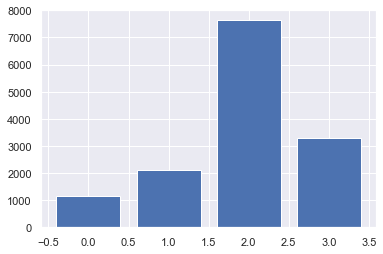

In [36]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# split into input and output elements
X=new_X_feat
y=y

# import train/test split module
from sklearn.model_selection import train_test_split

# Get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=7635 (48.265%)
Class=0, n=7635 (48.265%)
Class=1, n=7635 (48.265%)
Class=3, n=7635 (48.265%)


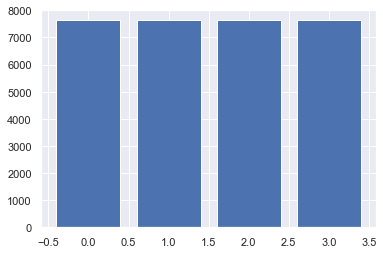

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# transform the dataset
oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more classification models that are able to accurately predict our classes. 

These are the models that will created:
- 1. Logistic Regression
- 2. Decision Tree
- 3. Random Forests
- 4. Naive Bayes
- 5. k nearest neighbuors
- 6. Support Vector Machines
- 7. Neural Networks




First all the classifiers are built together to see which ones will perform the best

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


from sklearn import metrics


In [42]:
#list of names of the models
names = ['Logistic Regression',
         'Decision Tree',
         'Random Forest',
         'Gaussian NB',
         'Multinomial NB',
         'Nearest Neighbors', 
         'linear SVc',          
        ]

#intstances of all the classifiers
classifiers = [
    LogisticRegression(max_iter=400),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MultinomialNB(),
    KNeighborsClassifier(3),
    LinearSVC(multi_class='ovr'),
    
]

In [43]:
results = []

models = {}
confusion = {}
class_report = {}

#each model is trained to make predictions and calculate metrics
for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred,average='micro')
    recall    = metrics.recall_score(y_train, y_pred,average='micro')
    
    f1        = metrics.f1_score(y_train, y_pred,average='micro')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,average='micro')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Gaussian NB model...
... predicting
... scoring
Fitting Multinomial NB model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting linear SVc model...
... predicting
... scoring
... All done!


In [46]:
#table of results
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Decision Tree,0.997086,0.997086,0.997086,0.997086,0.626422,73.089031
Random Forest,0.997086,0.997086,0.997086,0.997086,0.691530,165.179326
linear SVc,0.918599,0.918599,0.918599,0.918599,0.652339,2.689950
Logistic Regression,0.885363,0.885363,0.885363,0.885363,0.665613,80.153422
Nearest Neighbors,0.857760,0.857760,0.857760,0.857760,0.457649,0.352615
Multinomial NB,0.780026,0.780026,0.780026,0.780026,0.630847,0.482224
Gaussian NB,0.675573,0.675573,0.675573,0.675573,0.397598,6.558761


<AxesSubplot:xlabel='Classifier'>

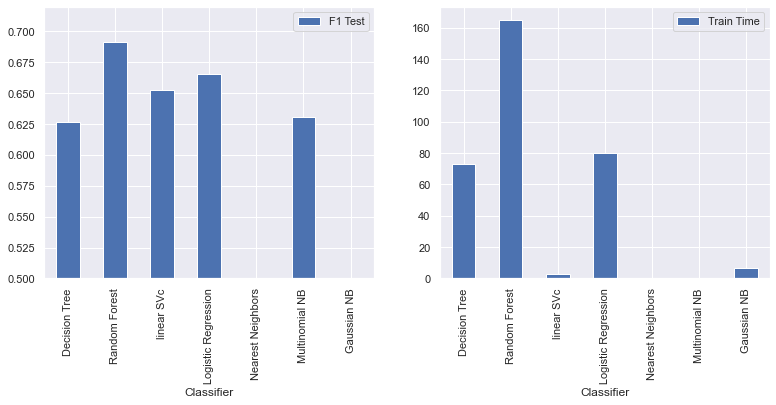

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.50,0.72])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### 5.1 Logistic regression classification

- <a href=#four>5.1.1 Model and predictions </a>
- <a href=#four>5.1.2 Logging results on comet</a>
- <a href=#four>5.1.3 Kaggle submission</a>


###### 5.1.1 Model and prediction results

In [38]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression

# create model object
lr = LogisticRegression(multi_class='ovr',max_iter=400)

# train model
lr.fit(X_train, y_train)

#Generate predictions
y_pred = lr.predict(X_test)


# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.38      0.56      0.45       126
           1       0.45      0.51      0.48       224
           2       0.82      0.67      0.74       895
           3       0.64      0.80      0.71       337

    accuracy                           0.66      1582
   macro avg       0.57      0.63      0.60      1582
weighted avg       0.70      0.66      0.67      1582



#### 5.1.2 Logging results on comet

In [39]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sixolilej/team-14-classification-sprint/ddf29641c5ff45dca34c10d674f67560



In [40]:
# lr parameters
params_lr = {"random_state=": 42,
      "model_type": "LogisticRegression",
      "scaler:": "standard scale"
         }

#f1 metric
from sklearn.metrics import f1_score
f1_lr=round(f1_score(y_test, y_pred, average='weighted'),2)

metrics_lr={"f1": f1_lr}

experiment.log_metrics(params_lr)
experiment.log_metrics(metrics_lr)


COMET WARNING: Converting metric value ''LogisticRegression'' into a string using str(), resulting string might be invalid
COMET WARNING: Converting metric value ''standard scale'' into a string using str(), resulting string might be invalid


In [41]:
experiment.end()


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sixolilej/team-14-classification-sprint/ddf29641c5ff45dca34c10d674f67560
COMET INFO:   Metrics:
COMET INFO:     f1            : 0.67
COMET INFO:     model_type    : LogisticRegression
COMET INFO:     random_state= : 42
COMET INFO:     scaler:       : standard scale
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (8.64 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     s

#### 5.1.3 Kaggle submission

In [43]:
preds=lr.predict(x_feat)
daf=pd.DataFrame(preds,columns=['sentiment'])
daf.head(2)

output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(daf)
submission.to_csv('submission4.csv',index=False)

submission.head(2)

,tweetid,sentiment
0,169760,3
1,35326,2



### 5.2 Decision Tree

- <a href=#four>5.2.1 Model and predictions </a>
- <a href=#four>5.2.2 Hyperparameter tuningt</a>
- <a href=#four>5.2.3 Logging results on comet</a>

###### 5.2.1 Model and predictions

In [44]:
# import DecisionTreeClassifier module
from sklearn.tree import DecisionTreeClassifier

# train model
forest = DecisionTreeClassifier(random_state=42)
forest.fit(X_train, y_train)

#Generate predictions
pred_forest_dt = forest.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_forest_dt))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       126
           1       0.35      0.42      0.38       224
           2       0.73      0.70      0.71       895
           3       0.63      0.61      0.62       337

    accuracy                           0.61      1582
   macro avg       0.52      0.53      0.52      1582
weighted avg       0.63      0.61      0.62      1582



#### 5.2.2 Hyperparameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV
params_dt = {'criterion':['gini','entropy'],'max_depth':[100,150,200,250,300,350,400,450,500]}
gs_nb = GridSearchCV(estimator=forest, 
                 param_grid=params_dt,    
                 verbose=1, 
                 scoring='f1_macro') 
gs_nb.fit(X_train, y_train)

gs_nb.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'criterion': 'gini', 'max_depth': 450}

_*Tuned Model*_

In [48]:
# import DecisionTreeClassifier module
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier instance
tree_tuned = DecisionTreeClassifier(criterion="gini", max_depth=450, random_state=42)
tree_tuned.fit(X_train, y_train)

#predictions on test
pred_tree_tuned = tree_tuned.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree_tuned))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       126
           1       0.37      0.40      0.38       224
           2       0.73      0.72      0.73       895
           3       0.64      0.62      0.63       337

    accuracy                           0.63      1582
   macro avg       0.52      0.53      0.53      1582
weighted avg       0.63      0.63      0.63      1582



#### 5.2.3 Logging results on comet

In [47]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sixolilej/team-14-classification-sprint/72ef4434ee48417ba9d27fa8d767d4f2
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (8.64 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook  

In [50]:
# dt parameters
params_dt = {
    "random_state=": 42,
    "model_type": "DecisionTreeClassifier",
    'criterion': 'gini', 
    'max_depth': 450
         }

#f1 metric
from sklearn.metrics import f1_score
f1_dt=round(f1_score(y_test, pred_tree_tuned, average='weighted'),2)

metrics_dt={"f1": f1_dt}

experiment.log_metrics(params_dt)
experiment.log_metrics(metrics_dt)

COMET WARNING: Converting metric value ''gini'' into a string using str(), resulting string might be invalid
COMET WARNING: Converting metric value ''DecisionTreeClassifier'' into a string using str(), resulting string might be invalid


In [51]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sixolilej/team-14-classification-sprint/11eef0de32c5417a8a7d68496bc6bca5
COMET INFO:   Metrics:
COMET INFO:     criterion     : gini
COMET INFO:     f1            : 0.63
COMET INFO:     max_depth     : 450
COMET INFO:     model_type    : DecisionTreeClassifier
COMET INFO:     random_state= : 42
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (8.65 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook            

### 5.3 Random Forests

- <a href=#four>5.3.1 Model and predictions </a>
- <a href=#four>5.3.2 Kaggle submission</a>
- <a href=#four>5.3.3 Logging results on comet</a>

###### 5.3.1 Model and predictions

In [58]:
from sklearn.ensemble import RandomForestClassifier

# create model object
model_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced')

# Fit the model 
model_rf.fit(X_train,y_train)

# Train the model
pred_forest = model_rf.predict(X_test)

from sklearn.metrics import classification_report

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47       126
           1       0.44      0.52      0.47       224
           2       0.78      0.78      0.78       895
           3       0.72      0.73      0.72       337

    accuracy                           0.70      1582
   macro avg       0.63      0.61      0.61      1582
weighted avg       0.70      0.70      0.70      1582



###### 5.3.2 Kaggle submission

In [61]:
preds_rf=model_rf.predict(x_feat)

In [62]:
daf=pd.DataFrame(preds_rf,columns=['index'])

daf['sentiment'] = ['-1' if x==0 else '0' if x==1 else '1' if x==2 else "2" for x in daf['index']]

daf1=daf.drop(["index"], axis=1)

output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(daf1)
submission.to_csv('submission_rf.csv',index=False)

submission.head(2)

,tweetid,sentiment
0,169760,2
1,35326,1


###### 5.3.3 Logging results on comet

In [63]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sixolilej/team-14-classification-sprint/058988b5c390481dadc0da5492aea9cb



In [66]:
# rf parameters
params_rf = {"random_state=": 42,
      "model_type": "RandomForestClassifier",
      "n_estimators:": 500,
       "class_weight:": "balanced"
         }

#f1 metric
from sklearn.metrics import f1_score
f1_rf=round(f1_score(y_test, pred_forest, average='weighted'),2)

metrics_rf={"f1": f1_rf}

experiment.log_metrics(params_rf)
experiment.log_metrics(metrics_rf)

COMET WARNING: Converting metric value ''balanced'' into a string using str(), resulting string might be invalid
COMET WARNING: Converting metric value ''RandomForestClassifier'' into a string using str(), resulting string might be invalid


In [67]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sixolilej/team-14-classification-sprint/058988b5c390481dadc0da5492aea9cb
COMET INFO:   Metrics:
COMET INFO:     class_weight: : balanced
COMET INFO:     f1            : 0.7
COMET INFO:     model_type    : RandomForestClassifier
COMET INFO:     n_estimators: : 500
COMET INFO:     random_state= : 42
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (8.52 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook         

### 5.4 Naive Bayes

- <a href=#four>5.4.1 Model and predictions </a>
- <a href=#four>5.4.2 Hyperparameter tuning</a>
- <a href=#four>5.4.3 Logging results on comet</a>


###### 5.4.1 Model and predictions

In [69]:
#import the model
from sklearn.naive_bayes import MultinomialNB

# Define the model 
ml_nb = MultinomialNB()
# Fit the model 
ml_nb.fit(X_train, y_train)

#Generate predictions
pred_ml_nb = ml_nb.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_ml_nb))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.33      0.57      0.42       126
           1       0.41      0.50      0.45       224
           2       0.82      0.62      0.71       895
           3       0.62      0.77      0.69       337

    accuracy                           0.63      1582
   macro avg       0.55      0.62      0.57      1582
weighted avg       0.68      0.63      0.64      1582



#### 5.4.2 Hyperparameter tuning

In [74]:
from sklearn.model_selection import GridSearchCV
para_nb = {  'alpha': (1, 0.1, 0.01, 0.001, 0.0001,0.00001,0)  }  
grid_search= GridSearchCV(ml_nb, para_nb,verbose=1, 
                 scoring='f1_weighted')
grid_search.fit(X_train,y_train)

grid_search.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


{'alpha': 0}

_*Model*_

In [77]:
# Define the model 
naive_bayes_better = MultinomialNB(alpha=0)
# Fit the model 
naive_bayes_better.fit(X_train, y_train)

# Generate predictions
y_pred_nb_better = naive_bayes_better.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb_better))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.35      0.43      0.38       126
           1       0.39      0.42      0.41       224
           2       0.77      0.68      0.72       895
           3       0.61      0.70      0.65       337

    accuracy                           0.63      1582
   macro avg       0.53      0.56      0.54      1582
weighted avg       0.65      0.63      0.63      1582



###### 5.4.3 Logging results on comet

In [78]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sixolilej/team-14-classification-sprint/d5561e8327d648f4b6212123dbcd0ea4



In [80]:
# dt parameters
params_nb = {
    "random_state=": 42,
    "model_type": "MultinomialNB",
    'alpha': 0
         }

#f1 metric
from sklearn.metrics import f1_score
f1_nb=round(f1_score(y_test, y_pred_nb_better, average='weighted'),2)

metrics_nb={"f1": f1_nb}

experiment.log_metrics(params_nb)
experiment.log_metrics(metrics_nb)

COMET WARNING: Converting metric value ''MultinomialNB'' into a string using str(), resulting string might be invalid


In [81]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sixolilej/team-14-classification-sprint/d5561e8327d648f4b6212123dbcd0ea4
COMET INFO:   Metrics:
COMET INFO:     alpha         : 0
COMET INFO:     f1            : 0.63
COMET INFO:     model_type    : MultinomialNB
COMET INFO:     random_state= : 42
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (8.53 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code        

### 5.5 k nearest neighbuors

- <a href=#four>5.5.1 Model and predictions </a>
- <a href=#four>5.5.2 Hyperparameter tuning</a>
- <a href=#four>5.5.3 Logging results on comet</a>

###### 5.5.1 Model and predictions

In [59]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 10 

# Define the model
knn = KNeighborsClassifier(n_neighbors,  weights='distance')
# Fit the model 
knn.fit(X_train, y_train)

# Generate predictions
y_pred_knn = knn.predict(X_test)

y_pred_knn=pd.DataFrame(y_pred_knn)

# Classification report
print(classification_report(y_test, y_pred_knn))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.24      0.61      0.35       126
           1       0.28      0.73      0.40       224
           2       0.91      0.27      0.42       895
           3       0.58      0.72      0.64       337

    accuracy                           0.46      1582
   macro avg       0.50      0.58      0.45      1582
weighted avg       0.70      0.46      0.46      1582



###### 5.5.2 Hyperparameter tuning

In [ ]:
ks = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

param_grid = {'n_neighbors': ks}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1')

grid_knn.fit(X, y)
grid_knn.best_params_

_*Model*_

In [ ]:
#optimum no. of neighbours
n_neighbors = 1 

#model instance
knn_improved = KNeighborsClassifier(n_neighbors,  weights='distance')
# Fit the model 
knn_improved.fit(X_train, y_train)

# Generate predictions
y_pred_knn_improved = knn_improved.predict(X_test)

y_pred_knn_improved=pd.DataFrame(y_pred_knn_improved)

# Classification report
print(classification_report(y_test, y_pred_knn_improved))

import warnings
warnings.filterwarnings('ignore')

###### 5.5.3 Logging results on comet


In [60]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sixolilej/team-14-classification-sprint/280bdfb436c74149aafe5bdba2149d83



In [ ]:
# dt parameters
params_knn = {
    "random_state=": 42,
    "model_type": "DecisionTreeClassifier",
    'n_neighbors': 1
         }

#f1 metric
from sklearn.metrics import f1_score
f1_knn=round(f1_score(y_test, y_pred_knn_improved, average='weighted'),2)

metrics_dt={"f1": f1_knn}

experiment.log_metrics(params_knn)
experiment.log_metrics(metrics_knn)

In [61]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sixolilej/team-14-classification-sprint/280bdfb436c74149aafe5bdba2149d83
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (8.71 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: skle

## 5.6 Support Vector Machines

- <a href=#four>5.6.1 Model and predictions </a>
- <a href=#four>5.6.2 Kaggle submission </a>
- <a href=#four>5.6.3 Hyperparameter tuning</a>
- <a href=#four>5.6.4 Logging results on comet</a>

###### 5.6.1 Model and predictions

In [82]:
from sklearn.svm import LinearSVC

# Instantiate support vector classification model
svc = LinearSVC(multi_class='ovr')

# train model
svc.fit(X_train,y_train)

#Generate predictions
y_pred_svc= svc.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.37      0.51      0.43       126
           1       0.40      0.44      0.42       224
           2       0.80      0.68      0.73       895
           3       0.65      0.79      0.71       337

    accuracy                           0.65      1582
   macro avg       0.55      0.60      0.57      1582
weighted avg       0.68      0.65      0.66      1582



###### 5.6.2 Kaggle submission

In [83]:
preds_svc=svc.predict(x_feat)

In [84]:
daf=pd.DataFrame(preds_svc,columns=['index'])

daf['sentiment'] = ['-1' if x==0 else '0' if x==1 else '1' if x==2 else "2" for x in daf['index']]

daf1=daf.drop(["index"], axis=1)

daf1.head(2)

,sentiment
0,2
1,0


In [86]:
output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(daf1)
#submission.to_csv('submission_svc.csv',index=False)

submission.head(2)

,tweetid,sentiment
0,169760,2
1,35326,0


###### 5.5.3 Hyperparameter tuning

In [89]:
#grid search
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 5, 100], 'penalty':['l1', 'l2'], "loss":['hinge','squared_hinge']}
grid_svc= GridSearchCV(svc,param_grid,refit=True,verbose=2, cv=2)
grid_svc.fit(X_train,y_train)
grid_svc.best_params_

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END ......................C=0.1, loss=hinge, penalty=l1; total time=   2.0s
[CV] END ......................C=0.1, loss=hinge, penalty=l1; total time=   2.1s
[CV] END ......................C=0.1, loss=hinge, penalty=l2; total time=   3.4s
[CV] END ......................C=0.1, loss=hinge, penalty=l2; total time=   3.4s
[CV] END ..............C=0.1, loss=squared_hinge, penalty=l1; total time=   1.9s
[CV] END ..............C=0.1, loss=squared_hinge, penalty=l1; total time=   1.9s
[CV] END ..............C=0.1, loss=squared_hinge, penalty=l2; total time=   2.8s
[CV] END ..............C=0.1, loss=squared_hinge, penalty=l2; total time=   2.9s
[CV] END ........................C=1, loss=hinge, penalty=l1; total time=   1.9s
[CV] END ........................C=1, loss=hinge, penalty=l1; total time=   1.8s
[CV] END ........................C=1, loss=hinge, penalty=l2; total time=   3.7s
[CV] END ........................C=1, loss=hinge

{'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'}

Model

In [90]:
from sklearn.svm import LinearSVC

# Instantiate support vector classification model
svc_tuned= LinearSVC(multi_class='ovr',C=10, loss='squared_hinge', penalty='l2')

# train model
svc_tuned.fit(X_train,y_train)

#Generate predictions
y_pred_svc_tuned= svc_tuned.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc_tuned))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.34      0.47      0.39       126
           1       0.40      0.45      0.42       224
           2       0.79      0.68      0.73       895
           3       0.63      0.73      0.68       337

    accuracy                           0.64      1582
   macro avg       0.54      0.58      0.56      1582
weighted avg       0.67      0.64      0.65      1582



###### 5.6.4 Logging results on comet

In [91]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sixolilej/team-14-classification-sprint/c2779a0b7feb4b6abf284a266c2943d8



In [92]:
# lr parameters
params_svc = {"random_state=": 42,
      "model_type": "LogisticRegression",
      "scaler:": "standard scale",
      'C': 10, 
      'loss': 'squared_hinge', 
      'penalty': 'l2'
         }

#f1 metric
from sklearn.metrics import f1_score
f1_svc=round(f1_score(y_test, y_pred_svc_tuned, average='weighted'),2)

metrics_svc={"f1": f1_svc}

experiment.log_metrics(params_svc)
experiment.log_metrics(metrics_svc)

COMET WARNING: Converting metric value ''squared_hinge'' into a string using str(), resulting string might be invalid
COMET WARNING: Converting metric value ''LogisticRegression'' into a string using str(), resulting string might be invalid
COMET WARNING: Converting metric value ''l2'' into a string using str(), resulting string might be invalid
COMET WARNING: Converting metric value ''standard scale'' into a string using str(), resulting string might be invalid


In [93]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sixolilej/team-14-classification-sprint/c2779a0b7feb4b6abf284a266c2943d8
COMET INFO:   Metrics:
COMET INFO:     C             : 10
COMET INFO:     f1            : 0.65
COMET INFO:     loss          : squared_hinge
COMET INFO:     model_type    : LogisticRegression
COMET INFO:     penalty       : l2
COMET INFO:     random_state= : 42
COMET INFO:     scaler:       : standard scale
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (8.56 MB)

## 5.7 Neural Networks 

- <a href=#four>5.7.1 Import libraries </a>
- <a href=#four>5.7.2 Model building </a>
- <a href=#four>5.7.3 Hyperparameter tuning</a>
- <a href=#four>5.7.4 Kaggle submission</a>
- <a href=#four>5.7.5 Logging results on comet</a>

In [38]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sixolilej/team-14-classification-sprint/8c50afd8af6c4d28bde973a9e634ac67



###### 5.7.1 Import libraries 

In [39]:
 #import important packages
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import tensorflow as tfd
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl

###### 5.8.2 Model building and metrics

In [40]:
X_train.shape

(30540, 4298)

In [41]:
# create model instance
model_nn = Sequential([
  Dense(4298, activation='relu',input_shape=(4298,)),
  Dense(3000, activation='relu'),
  Dense(1500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(4, activation='softmax'),
])

model_nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                 metrics=['sparse_categorical_accuracy'])

In [44]:
# train model
history = model_nn.fit(X_train, y_train, batch_size=500, epochs=20, verbose=True, validation_split=0.20)

Epoch 1/20
49/49 [==============================] - 27s 540ms/step - loss: 0.0549 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.1813 - val_sparse_categorical_accuracy: 0.9420
Epoch 2/20
49/49 [==============================] - 28s 577ms/step - loss: 0.0764 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.2511 - val_sparse_categorical_accuracy: 0.9363
Epoch 3/20
49/49 [==============================] - 28s 568ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9814 - val_loss: 0.3291 - val_sparse_categorical_accuracy: 0.9245
Epoch 4/20
49/49 [==============================] - 27s 550ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.2177 - val_sparse_categorical_accuracy: 0.9389
Epoch 5/20
49/49 [==============================] - 27s 545ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9902 - val_loss: 0.2126 - val_sparse_categorical_accuracy: 0.9425
Epoch 6/20
49/49 [==============================] - 30s 605ms/step - loss: 0.0218 - sparse_cate

In [43]:
# Evaluating the model
loss, accuracy  = model_nn.evaluate(X_test, y_test, verbose=False)

accuracy

0.7085967063903809

In [53]:
loss

2.308239221572876

###### 5.8.3 Hyperparameter tuning

In [42]:
#model instance
model=KerasClassifier(build_fn=build_clf)

<ipython-input-42-054a20d19e31>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)


###### 5.8.4 Kaggle submission

In [63]:
#Generate predictions
preds_nn=model_nn.predict(x_feat)

#preds_nn=np.argmax(preds_nn, axis=1)

preds_nn.shape

(10546,)

In [64]:
daf=pd.DataFrame(preds_nn,columns=['index'])

daf['sentiment'] = ['-1' if x==0 else '0' if x==1 else '1' if x==2 else "2" for x in daf['index']]

daf1=daf.drop(["index"], axis=1)

output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(daf1)
submission.to_csv('submission_nn.csv',index=False)

submission.head(2)

,tweetid,sentiment
0,169760,2
1,35326,1


In [45]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sixolilej/team-14-classification-sprint/8c50afd8af6c4d28bde973a9e634ac67
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     batch_loss [160]                                : (0.005606189835816622, 1.3842864036560059)
COMET INFO:     batch_sparse_categorical_accuracy [160]         : (0.29600000381469727, 1.0)
COMET INFO:     epoch_duration [40]                             : (20.172000000000025, 31.687999999999874)
COMET INFO:     loss [40]                                       : (0.012422996573150158, 0.9147238731384277)
COMET INFO:     sparse_categorical_accuracy [40]                : (0.5904960632324219, 0.994638204574585)
COMET INFO:     val_loss [40]                                   : (0.10356635600328445, 0.7630723118782043)
COMET INFO

## 6. Model Performance


Of the fitted 8 models to the data provided.Performance has been evaluated using the Weighted F1-score.  A F1-score  is a mean of a classes performance, based on two factors i.e. precision and recall.

Precision is the quality of a *positive predictions* made by the model. It refers to the number of true positives divided by the total number of positive predictions.

Recall is the measure of our model *correctly identifying true positives*. Recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

| Model | Weighted F1-score | Weighted F1-score on unseen test data |
|:--- |:--- |:--- |
|1. Logistic Regression | |
 |2. Decision Tree  | |
 |3. Random Forests| |
 |4. Naive Bayes | |
 |5. k nearest neighbuors | |
 |6. Support Vector Machines| |
 |7. xgboost | |
 |8. Neural Networks | |


The model that has the best performance accuracy is the Neural Network model. It perfromed the best

## 7. Model Explanations

This is a discussion how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings.

A neural network tries to simulate the human brain. It has many layers of "neurons" just like the neurons in our brain.The first layer of neurons will receive inputs like images, video, sound, text, etc. In our dataset the neurons are a vector of words from the tweets that are most significant in prediciting a class.


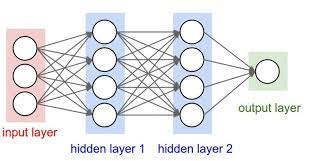


The input layer receives various forms of information, this is the data that the network tries to classify. From the input unit, the data goes through one or more hidden units. The output layer is responsible for producing the final result.



The neural network uses a series of algorithms that try to recognize underlying relationships within the neurons and the classes so as to make a class prediction. When we as humans touch something hot, the neurons in our body transmit signal to the brain. The brain then produces impulses to withdraw from the hot area. We are trained based on the past experiences to start taking better decisions.Using the same analogy, when we send an input to a neural network then based on the learning(previous experiences) it produces an output.